Stock market Predication using Numerical Analysis.

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [ ]:
#importing various library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet

In [ ]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2016-01-02', end='2021-09-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
bse_data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)

In [ ]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1391 entries, 2016-01-04 to 2021-08-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      1391 non-null   float64
 1   high      1391 non-null   float64
 2   low       1391 non-null   float64
 3   close     1391 non-null   float64
 4   adjclose  1391 non-null   float64
 5   volume    1391 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 76.1 KB


In [ ]:
bse_data

,open,high,low,close,adjclose,volume
Date,,,,,,
2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...
2021-08-25,56067.058594,56198.128906,55899.960938,55944.210938,55944.210938,5400
2021-08-26,55988.410156,56112.390625,55854.070312,55949.101562,55949.101562,8300
2021-08-27,55862.929688,56188.230469,55675.871094,56124.718750,56124.718750,6000


In [ ]:
bse_data.describe()

,open,high,low,close,adjclose,volume
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000,1.391000e+03
mean,35858.137780,36027.310847,35604.877768,35813.735153,35813.735153,2.435127e+05
std,7482.415325,7509.089042,7433.082331,7479.176079,7479.176079,1.997899e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,1.000000e+02
25%,30298.540039,30583.690430,30011.785156,30222.169922,30222.169922,1.050000e+04
50%,35366.449219,35543.890625,35136.011719,35319.351562,35319.351562,1.420000e+04
75%,39159.224609,39316.675781,38882.019531,39070.625000,39070.625000,1.935000e+04
max,56995.148438,57625.261719,56859.101562,57552.390625,57552.390625,3.181510e+07


In [ ]:
def find_null(dft):
    num_null = dft.isnull().sum().sort_values(ascending = False)
    percentage_null = round(dft.isnull().sum().sort_values(ascending = False)/len(dft) * 100, 1)
    return pd.DataFrame(np.c_[num_null, percentage_null], index = num_null.index,  columns = ['Null', 'Percentage'])

In [ ]:
find_null(bse_data)

,Null,Percentage
volume,0.0,0.0
adjclose,0.0,0.0
close,0.0,0.0
low,0.0,0.0
high,0.0,0.0
open,0.0,0.0


In [ ]:
bse_data.reset_index(inplace=True)
bse_data.rename(columns={'Date': 'date'}, inplace = True)
bse_data.head()

,date,open,high,low,close,adjclose,volume
0,2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
1,2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2,2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
3,2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
4,2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900


In [ ]:
bse_data.isna().sum()

date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64

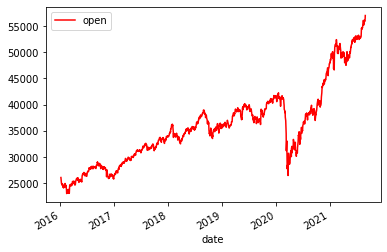

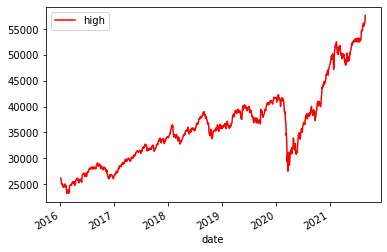

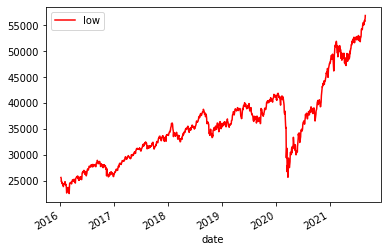

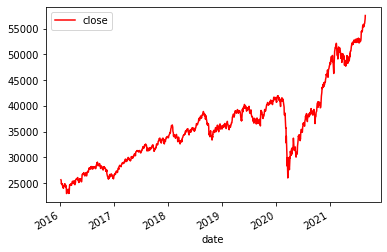

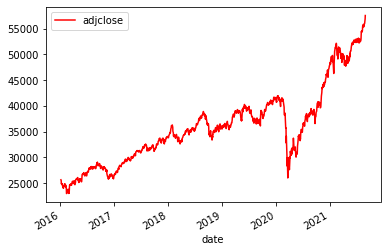

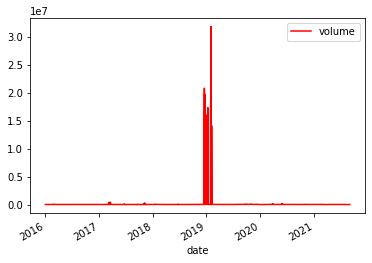

In [ ]:
poll= ['open','high','low','close','adjclose','volume']
for pollutant in poll:
    bse_data.plot.line(x='date', y=pollutant, color='red')

In [ ]:
bse_data['date'] = pd.to_datetime(bse_data.date, format ='%Y/%m/%d')
data = bse_data.drop(['date'], axis=1)
data.index = bse_data.date

In [ ]:
split_date = '31-08-2019'
ts_train = data.loc[data.index <= split_date].copy()
ts_test = data.loc[data.index > split_date].copy()

In [ ]:
ts_train.reset_index() \
    .rename(columns={'Date':'ds','volume':'y'})

,date,open,high,low,close,adjclose,y
0,2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
1,2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2,2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
3,2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
4,2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...,...
896,2019-08-26,37363.949219,37544.480469,36492.648438,37494.121094,37494.121094,35600
897,2019-08-27,37658.480469,37731.511719,37449.691406,37641.269531,37641.269531,36500
898,2019-08-28,37655.769531,37687.820312,37249.191406,37451.839844,37451.839844,28600
899,2019-08-29,37381.800781,37381.800781,36987.351562,37068.929688,37068.929688,31700


In [ ]:
# Setup and train model and fit
model = Prophet()
model.fit(ts_train.reset_index() \
          .rename(columns={'date':'ds','open':'y'}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Predict on training set with model
ts_test_fcst = model.predict(df=ts_test.reset_index() \
                                   .rename(columns={'date':'ds'}))


In [ ]:
fut = list()
for i in range(9,12):
	date = '2020-%2d' %i
	fut.append([date])
fut = DataFrame(fut)
fut.columns = ['ds']
fut['ds']= to_datetime(fut['ds'])
# use the model to make a forecast
forecasting = model.predict(fut)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


Text(0.5, 1.0, 'Forecasting of stock Market')

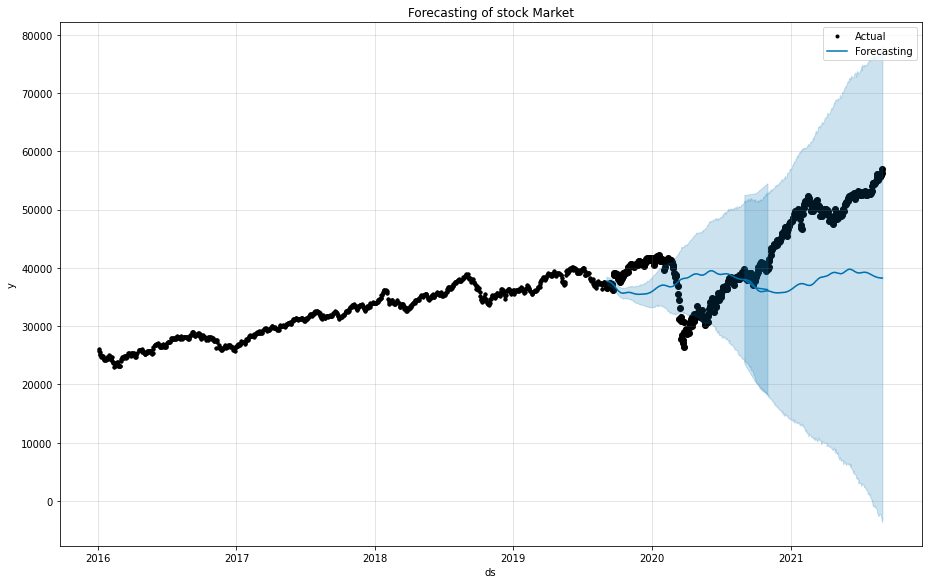

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(8)
f.set_figwidth(13)
ax.scatter(ts_test.index, ts_test['open'], color='black')
fig = model.plot(ts_test_fcst, ax=ax)
fig1=model.plot(forecasting, ax=ax)
plt.legend(["Actual","Forecasting"])
plt.title("Forecasting of stock Market")